In [1]:
import warnings
import pandas as pd
import scanpy as sc
import numpy as np
import scrublet as scr
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Process adata object

In [2]:
adata = sc.read_h5ad("/data/class/cosmos2023/PUBLIC/shai_hulud/scanpy/gastroc_adata.h5ad")

In [3]:
#sc.pp.filter_cells(adata, min_genes=300)
#sc.pp.filter_genes(adata, min_cells=3)


In [4]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


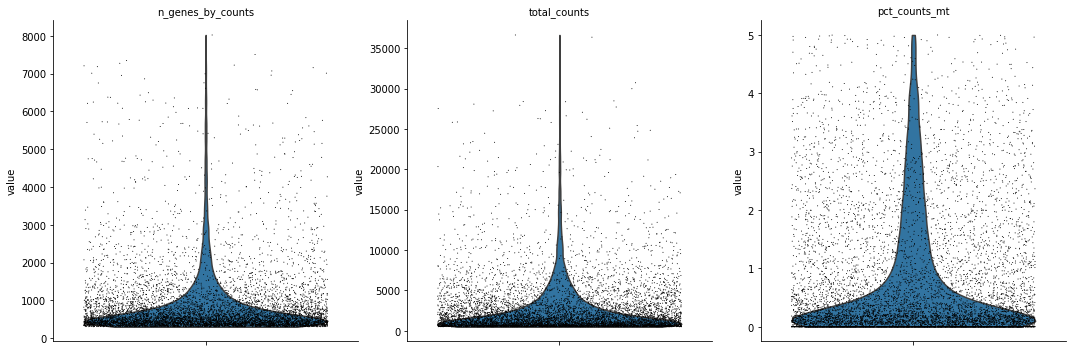

In [5]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

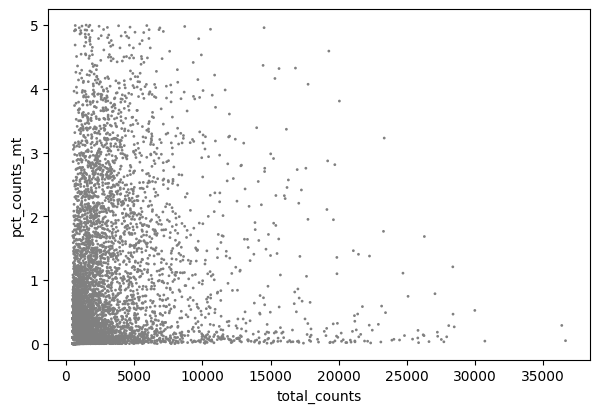

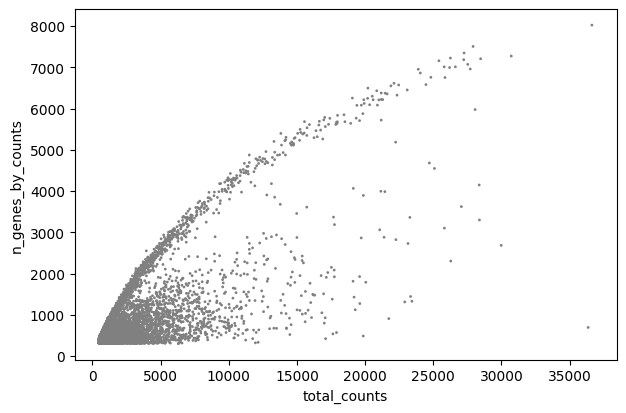

In [6]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [7]:
#adata = adata[adata.obs.n_genes_by_counts < 2500, :]
#adata = adata[adata.obs.pct_counts_mt < 10, :]

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [9]:
sc.pp.log1p(adata)

In [10]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [11]:
adata.raw = adata

In [12]:
adata = adata[:, adata.var.highly_variable]

In [13]:
sc.tl.pca(adata, svd_solver='arpack')

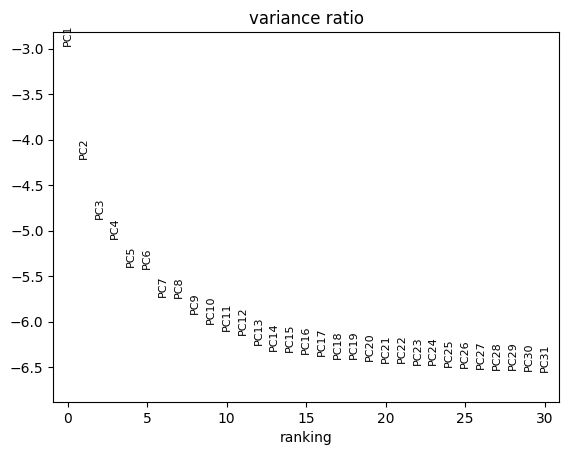

In [14]:
sc.pl.pca_variance_ratio(adata, log=True)

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

/opt/apps/python/3.8.0/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/apps/python/3.8.0/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/apps/python/3.8.0/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [16]:
# calculate UMAP 
sc.tl.umap(adata)

In [17]:
# run leiden clustering
sc.tl.leiden(adata)

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


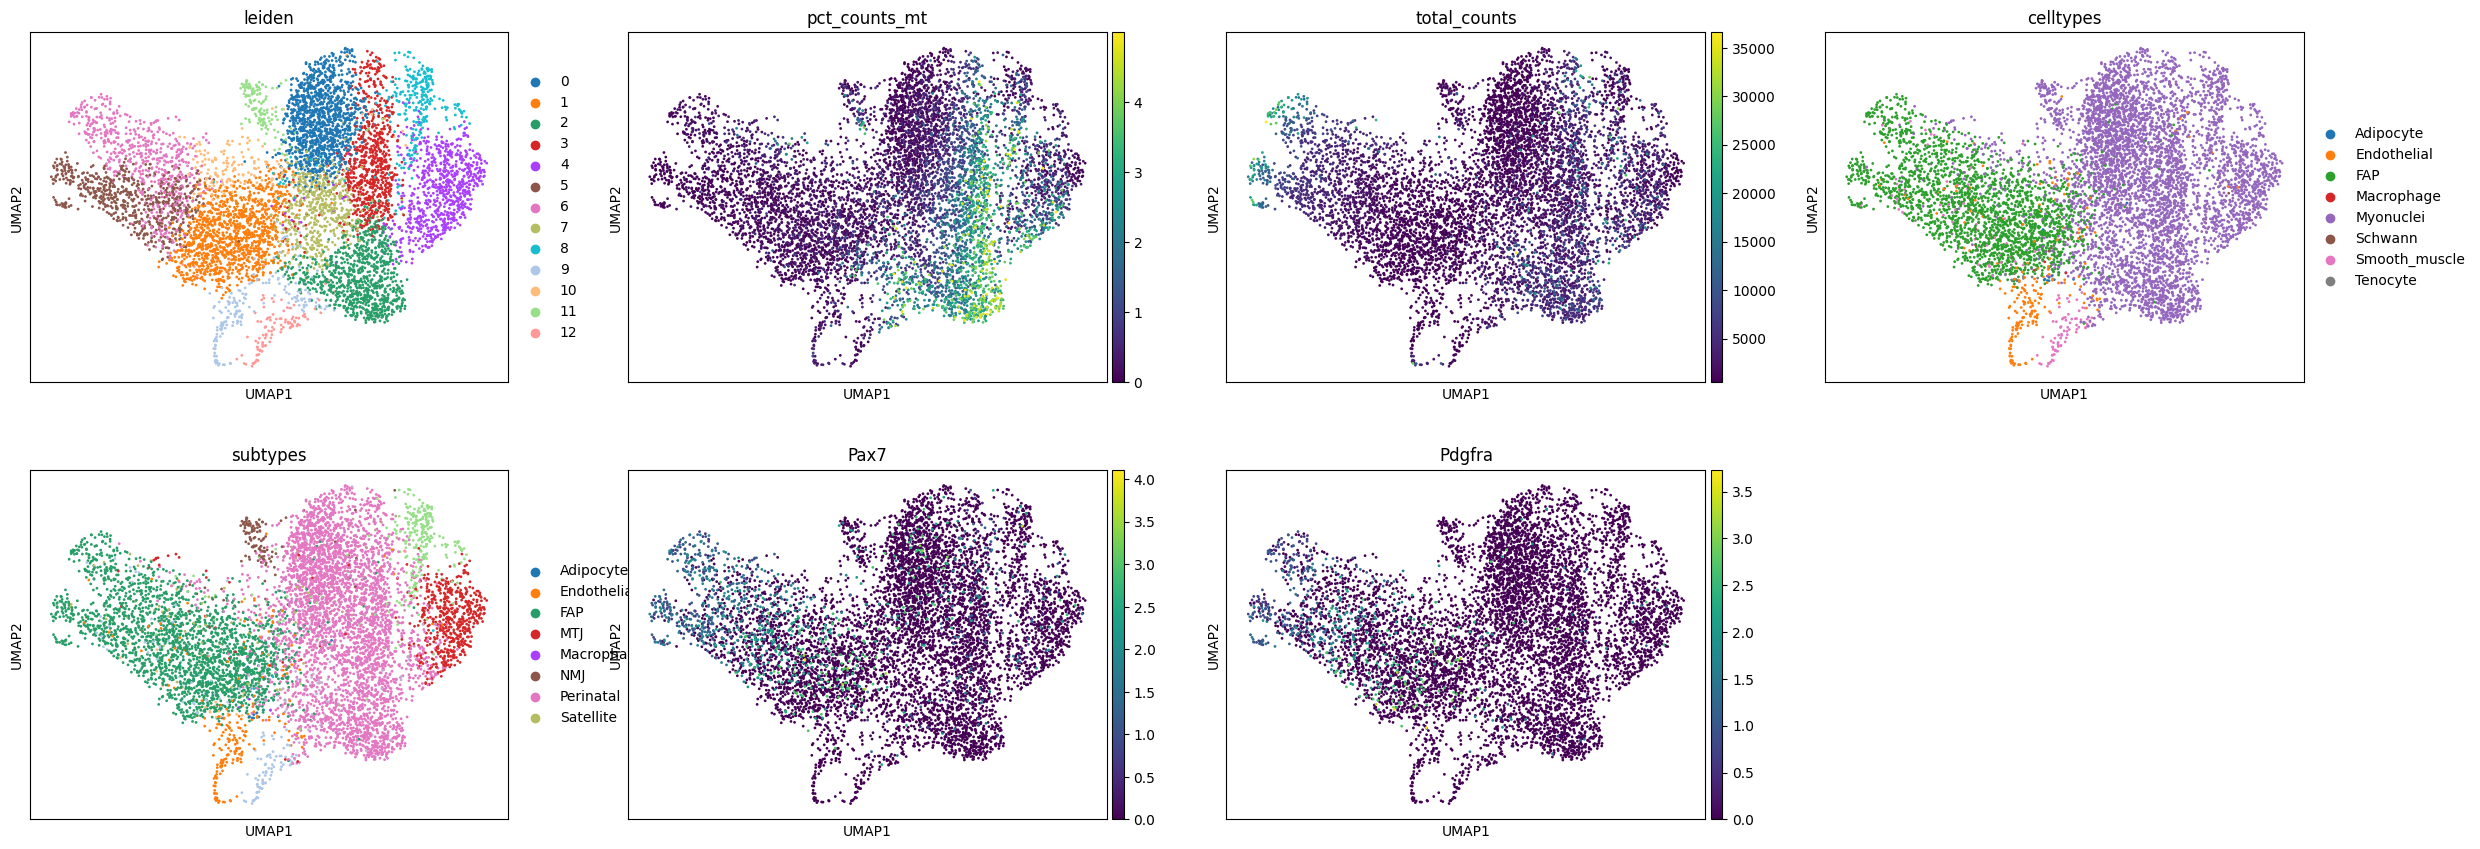

In [22]:
sc.pl.umap(adata, color=['leiden', 'pct_counts_mt', 'total_counts', 'celltypes', 'subtypes', 'Pax7', 'Pdgfra'])

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


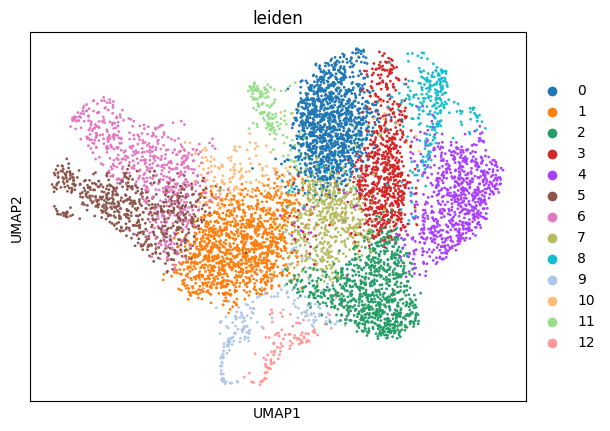

In [19]:
sc.pl.umap(adata, color=['leiden'])

In [20]:
category_proportions = pd.crosstab(adata.obs['leiden'], adata.obs['Genotype']).apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the bar plot
ax = category_proportions.plot(kind='barh', stacked=True)

# Add labels
plt.xlabel('Proportion (%)')
plt.ylabel('Cluster')


# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

# Set the desired width and height in inches
width = 6
height = 4
fig = plt.gcf()
fig.set_size_inches(width, height)

# Save the plot as a PNG file with high quality
output_file = 'tissue_barplot.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


KeyError: 'Genotype'

In [ ]:
category_proportions = pd.crosstab(adata.obs['celltypes'], adata.obs['Genotype']).apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the bar plot
ax = category_proportions.plot(kind='barh', stacked=True)

# Add labels
plt.xlabel('Proportion (%)')
plt.ylabel('Cluster')


# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

# Set the desired width and height in inches
width = 6
height = 4
fig = plt.gcf()
fig.set_size_inches(width, height)

# Save the plot as a PNG file with high quality
output_file = 'tissue_barplot.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
sc.pl.umap(adata, color=['Myh1','Myh2', 'Myh7','Flt1' ])